### Reproducibility Note
This notebook uses relative paths and automated CSV aggregation.
All results can be reproduced by placing datasets in the specified folder structure.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [42]:
def load_folder_csv(folder):
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".csv")]
    return pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

enrol_df = load_folder_csv("enrollment")
demo_df  = load_folder_csv("demographic")
bio_df   = load_folder_csv("biometric")


In [43]:
enrol_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [44]:
demo_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [45]:
bio_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [46]:
enrol_df["year"] = pd.to_datetime(enrol_df["date"], format="%d-%m-%Y").dt.year
demo_df["year"]  = pd.to_datetime(demo_df["date"], format="%d-%m-%Y").dt.year
bio_df["year"]   = pd.to_datetime(bio_df["date"], format="%d-%m-%Y").dt.year


In [47]:
enrol_df[["date","year"]].head()


,date,year
0,02-03-2025,2025
1,09-03-2025,2025
2,09-03-2025,2025
3,09-03-2025,2025
4,09-03-2025,2025


In [48]:
demo_df[["date","year"]].head()


,date,year
0,01-03-2025,2025
1,01-03-2025,2025
2,01-03-2025,2025
3,01-03-2025,2025
4,01-03-2025,2025


In [49]:
bio_df[["date","year"]].head()


,date,year
0,01-03-2025,2025
1,01-03-2025,2025
2,01-03-2025,2025
3,01-03-2025,2025
4,01-03-2025,2025


In [50]:
enrol_df["total_enrolments"] = (
    enrol_df["age_0_5"] +
    enrol_df["age_5_17"] +
    enrol_df["age_18_greater"]
)

demo_df["total_demo_updates"] = (
    demo_df["demo_age_5_17"] +
    demo_df["demo_age_17_"]
)

bio_df["total_bio_updates"] = (
    bio_df["bio_age_5_17"] +
    bio_df["bio_age_17_"]
)


In [51]:
demo_df[["state","total_demo_updates"]].head()


,state,total_demo_updates
0,Uttar Pradesh,578
1,Andhra Pradesh,397
2,Gujarat,830
3,Andhra Pradesh,338
4,Rajasthan,830


In [52]:
age_share = enrol_df[["age_0_5","age_5_17","age_18_greater"]].sum()
age_share = age_share / age_share.sum() * 100
age_share

age_0_5           65.253117
age_5_17          31.649711
age_18_greater     3.097171
dtype: float64

In [53]:
demo_age_share = demo_df[["demo_age_5_17","demo_age_17_"]].sum()
demo_age_share = demo_age_share / demo_age_share.sum() * 100
demo_age_share

demo_age_5_17     9.865921
demo_age_17_     90.134079
dtype: float64

In [54]:
bio_age_share = bio_df[["bio_age_5_17","bio_age_17_"]].sum()
bio_age_share = bio_age_share / bio_age_share.sum() * 100
bio_age_share

bio_age_5_17    49.061549
bio_age_17_     50.938451
dtype: float64

In [55]:
state_enrol = enrol_df.groupby("state")["total_enrolments"].sum()
state_enrol



state
100000                                              218
Andaman & Nicobar Islands                           114
Andaman and Nicobar Islands                         397
Andhra Pradesh                                   127681
Arunachal Pradesh                                  4344
Assam                                            230197
Bihar                                            609585
Chandigarh                                         2723
Chhattisgarh                                     103219
Dadra & Nagar Haveli                                 25
Dadra and Nagar Haveli                              744
Dadra and Nagar Haveli and Daman and Diu            173
Daman & Diu                                          21
Daman and Diu                                       120
Delhi                                             94529
Goa                                                2333
Gujarat                                          280549
Haryana                                   

In [56]:
state_demo  = demo_df.groupby("state")["total_demo_updates"].sum()
state_demo

state
100000                               2
Andaman & Nicobar Islands         1059
Andaman and Nicobar Islands       6187
Andhra Pradesh                 2295505
Arunachal Pradesh                36443
                                ...   
West bengal                         60
Westbengal                          95
andhra pradesh                      77
odisha                              20
west Bengal                         15
Name: total_demo_updates, Length: 65, dtype: int64

In [57]:
state_bio   = bio_df.groupby("state")["total_bio_updates"].sum()
state_bio

state
Andaman & Nicobar Islands                      2384
Andaman and Nicobar Islands                   18314
Andhra Pradesh                              3714592
Arunachal Pradesh                             72394
Assam                                        982722
Bihar                                       4897587
Chandigarh                                    74482
Chhatisgarh                                       5
Chhattisgarh                                2648729
Dadra & Nagar Haveli                            553
Dadra and Nagar Haveli                        27235
Dadra and Nagar Haveli and Daman and Diu       2532
Daman & Diu                                    2185
Daman and Diu                                  6763
Delhi                                       1304362
Goa                                           68397
Gujarat                                     3196514
Haryana                                     1635454
Himachal Pradesh                             396234
Jammu 

In [58]:
indicator_df = pd.DataFrame({
    "enrolments": state_enrol,
    "demo_updates": state_demo,
    "bio_updates": state_bio
})

In [59]:
indicator_df["demo_pressure"] = indicator_df["demo_updates"] / indicator_df["enrolments"]

In [60]:
indicator_df["bio_pressure"]  = indicator_df["bio_updates"] / indicator_df["enrolments"]

In [61]:
indicator_df["update_pressure"] = (indicator_df["demo_pressure"] + indicator_df["bio_pressure"])

In [62]:
filtered_df = indicator_df[indicator_df["enrolments"] >= 1000]


### Age-wise Enrolment Share

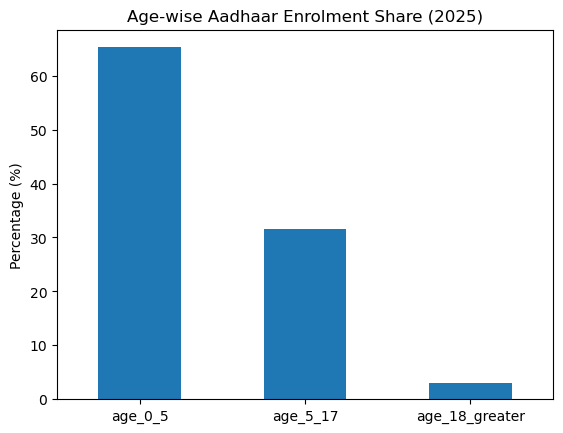

In [63]:
age_share.plot(kind="bar", title="Age-wise Aadhaar Enrolment Share (2025)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


### Update Behaviour by Age

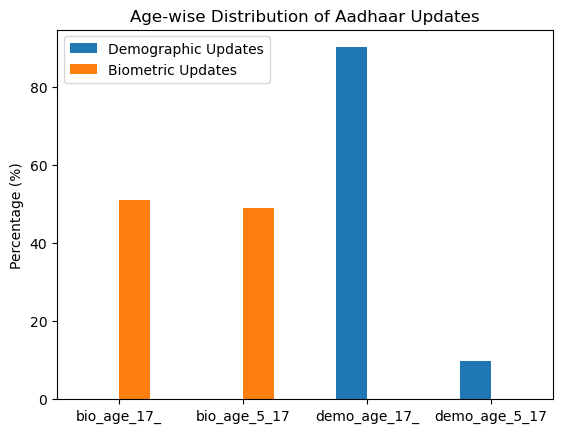

In [64]:
pd.DataFrame({
    "Demographic Updates": demo_age_share,
    "Biometric Updates": bio_age_share
}).plot(kind="bar", title="Age-wise Distribution of Aadhaar Updates")

plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


### State-wise Update Pressure

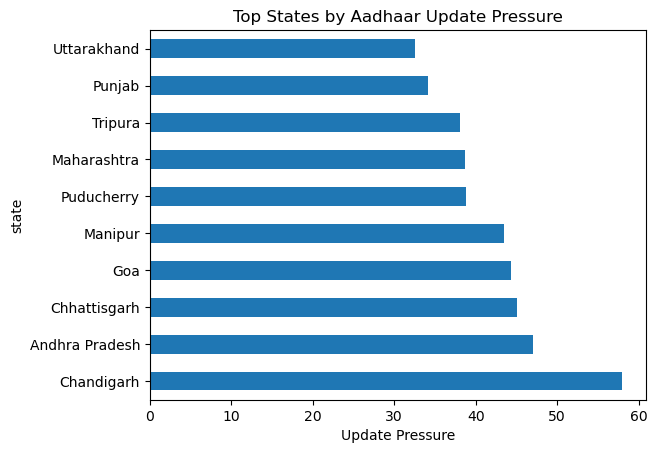

In [65]:
filtered_df.sort_values("update_pressure", ascending=False)\
           .head(10)["update_pressure"]\
           .plot(kind="barh", title="Top States by Aadhaar Update Pressure")

plt.xlabel("Update Pressure")
plt.show()
